In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
df = pd.read_excel("../data/adminsrvad.sa.gov.audfsrootusersssaservdeliveryemployeeservmoulet01my-documentsopen-data-2016pr.xlsx", engine="openpyxl", skiprows=4)

df = df.dropna(axis=1, how="all")
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns = ['Unnamed: 0'])

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.head()

,Agency Name,Jun - 15,Jul - 15,Aug - 15,Sep - 15,Oct - 15,Nov - 15,Dec - 15,Jan - 16,Feb - 16,Mar - 16,Apr - 16,May - 16
0,Attorney-General's Department,2317,2419,2029,2418,2122,1939,2242,1551,1753,2076,2226,2129
1,Defence SA,227,203,156,197,184,164,214,139,141,201,195,165
2,Department for Communities and Social Inclusion,22375,30473,17933,160025,32771,23067,22891,28252,47224,21214,31145,19598
3,Department for Correctional Services,3545,4162,3255,4058,4323,3716,3823,3386,3566,4065,4432,4341
4,Department for Education and Child Development,21929,21294,19113,19484,22789,20315,19418,16623,18526,22453,18421,23140


In [4]:
df.describe()

,Jun - 15,Jul - 15,Aug - 15,Sep - 15,Oct - 15,Nov - 15,Dec - 15,Jan - 16,Feb - 16,Mar - 16,Apr - 16,May - 16
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,7228.666667,7259.629630,6164.074074,12135.629630,7447.888889,6862.740741,6862.259259,5503.925926,7168.703704,6966.000000,7002.814815,7237.703704
std,7990.204094,8383.442964,7058.970223,30454.206706,8842.267401,7739.442489,7872.997467,7027.598791,10342.653791,7777.697247,8182.767963,8149.050458
min,81.000000,99.000000,40.000000,44.000000,33.000000,45.000000,42.000000,28.000000,38.000000,35.000000,41.000000,50.000000
25%,2047.000000,2023.000000,1442.500000,1709.500000,1822.000000,1658.500000,1709.000000,1327.500000,1428.500000,1699.500000,1828.500000,1872.500000
50%,3545.000000,3446.000000,2753.000000,3400.000000,3299.000000,3377.000000,3389.000000,2625.000000,2862.000000,3556.000000,3214.000000,3525.000000
75%,8673.500000,8951.500000,7531.000000,9071.500000,9693.500000,8781.000000,8304.500000,6570.500000,7968.500000,9082.000000,9137.000000,9372.500000
max,25047.000000,30473.000000,23184.000000,160025.000000,32771.000000,23425.000000,25975.000000,28252.000000,47224.000000,24930.000000,31145.000000,24827.000000


In [5]:
df_long = pd.melt(
    df,
    id_vars=['Agency Name'],
    var_name='Month',
    value_name='Invoices Paid'
)

In [26]:
# Remove commas and convert into numeric
df_long['Invoices Paid'] = (
    df_long['Invoices Paid']
    .astype(str)
    .str.replace(",", "", regex = False)
)

df_long['Invoices Paid'] = pd.to_numeric(df_long['Invoices Paid'], errors = 'coerce')

# Convert Month to dateTime
df_long['Month'] = pd.to_datetime(df_long['Month'], format = "%b - %y", errors = 'coerce')

# Drop rows with invalid months and NaNs
df_long = df_long.dropna(subset=['Month', 'Invoices Paid'])
df_long = df_long.sort_values(by="Month")
df_long.head()

,Agency Name,Month,Invoices Paid,Z-Score,Is_Outlier_Z
0,Attorney-General's Department,2015-06-01,2317,0.866417,False
7,Department of Primary Industries and Regions,2015-06-01,2155,1.763990,False
11,Department of Treasury and Finance (Department...,2015-06-01,1939,1.250782,False
10,Department of the Premier and Cabinet,2015-06-01,2510,1.353091,False
9,Department of State Development (DSD),2015-06-01,2862,1.406894,False


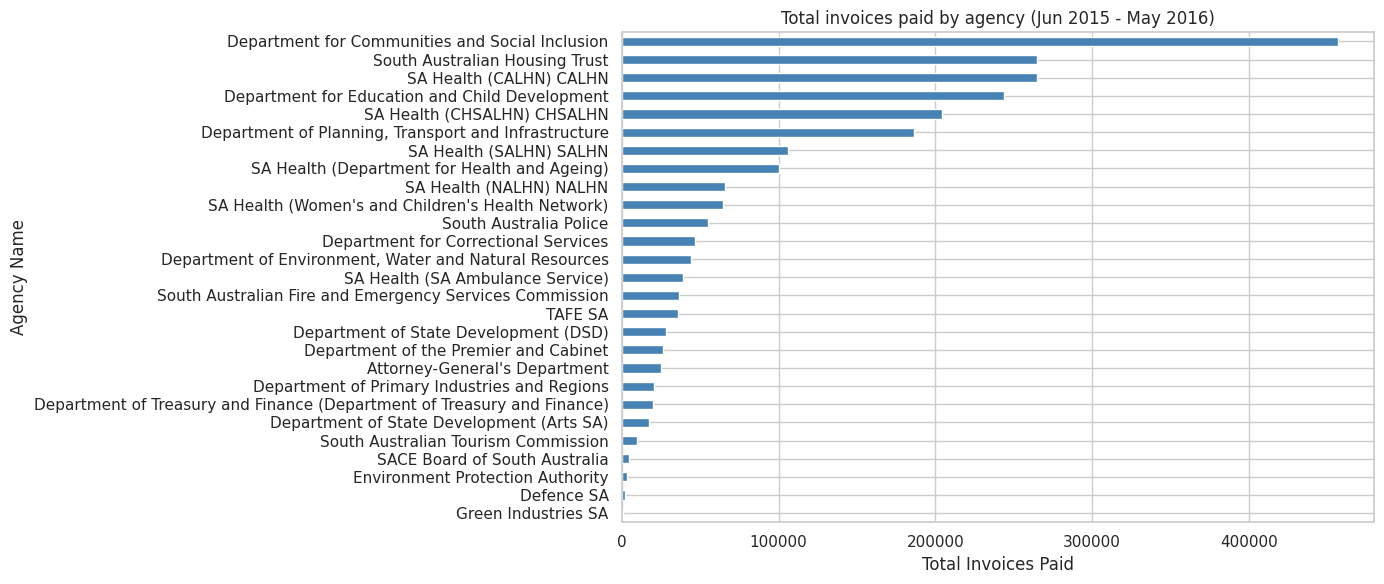

In [27]:
plt.figure(figsize=(14, 6))
total_by_agency = df_long.groupby('Agency Name')['Invoices Paid'].sum().sort_values()
total_by_agency.plot(kind="barh", color="steelblue")

plt.title('Total invoices paid by agency (Jun 2015 - May 2016)')
plt.xlabel('Total Invoices Paid')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

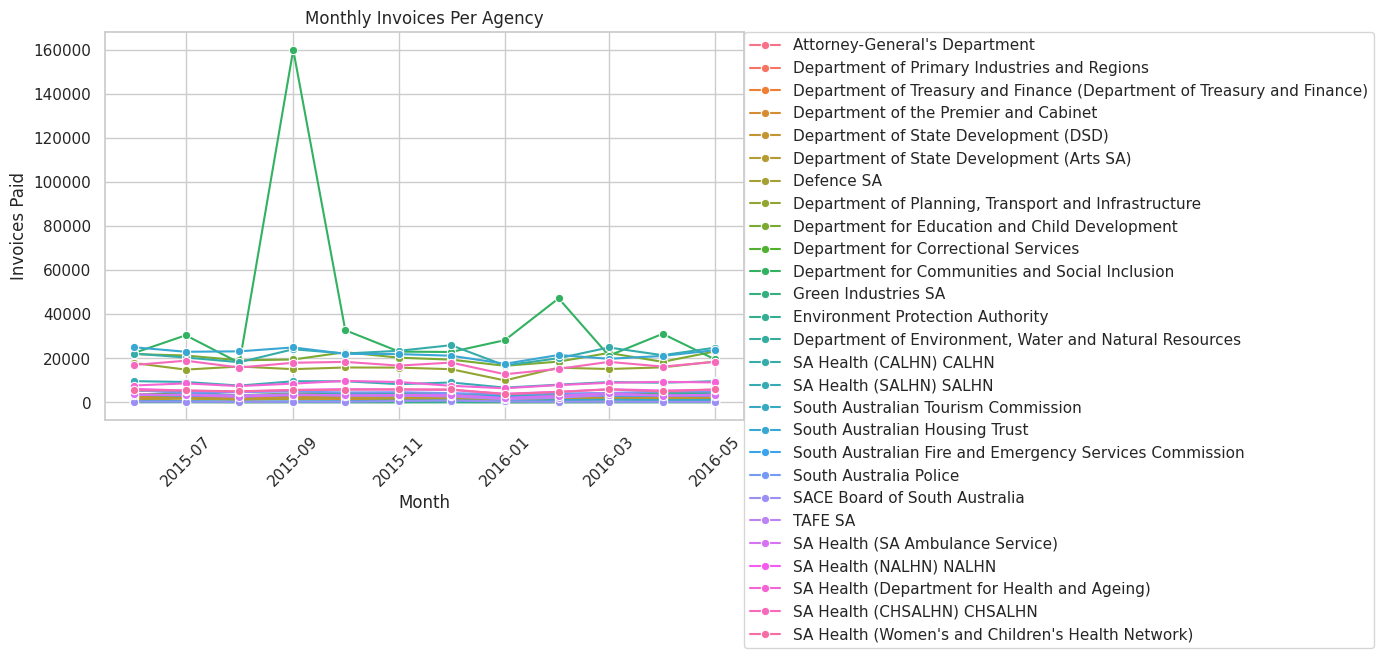

In [28]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_long, x='Month', y = 'Invoices Paid', hue='Agency Name', marker='o')

plt.title("Monthly Invoices Per Agency")
plt.xlabel("Month")
plt.ylabel("Invoices Paid")
plt.xticks(rotation = 45)

# Move legend to the bottom
plt.legend(bbox_to_anchor=(1.0001, 1), loc="upper left", borderaxespad = 0.)

plt.tight_layout()
plt.show()

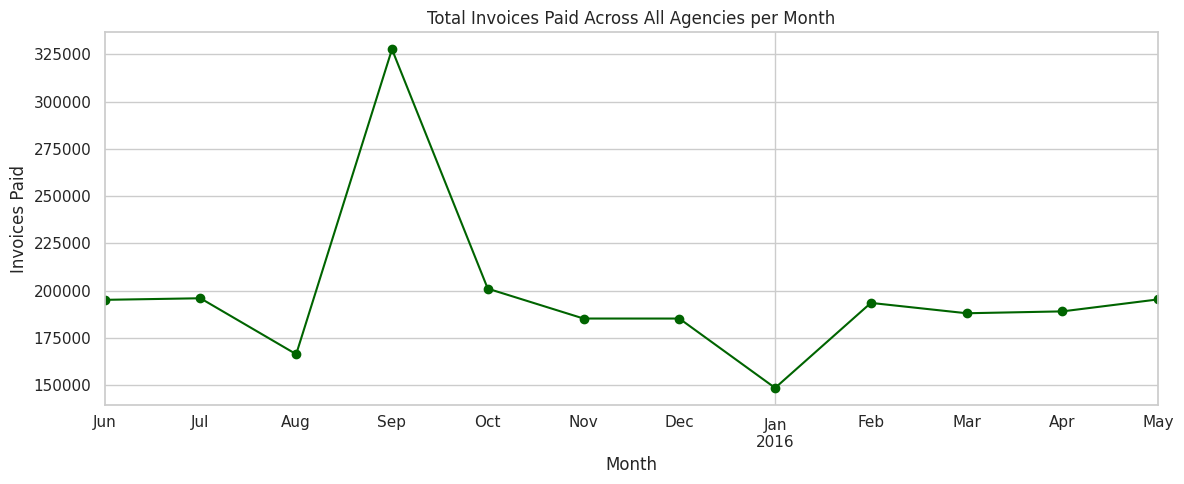

In [29]:
monthly_total = df_long.groupby('Month')['Invoices Paid'].sum()

plt.figure(figsize=(12, 5))
monthly_total.plot(marker='o', color='darkgreen')

plt.title('Total Invoices Paid Across All Agencies per Month')
plt.xlabel('Month')
plt.ylabel('Invoices Paid')
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
df_long.to_excel("../data/cleaned_ap_data.xlsx", index=False)

In [30]:
from scipy.stats import zscore

# Compute z score within each agency
df_long['Z-Score'] = df_long.groupby('Agency Name')['Invoices Paid'].transform(zscore)

# Flag Outlier above +- 2 SD 
df_long['Is_Outlier_Z'] = df_long['Z-Score'].abs() > 2

# View Outlier
df_long[df_long['Is_Outlier_Z']].sort_values(by="Z-Score", ascending=False).head(10)

,Agency Name,Month,Invoices Paid,Z-Score,Is_Outlier_Z
83,Department for Communities and Social Inclusion,2015-09-01,160025,3.247558,True
183,SACE Board of South Australia,2015-12-01,875,2.659937,True
40,Green Industries SA,2015-07-01,99,2.560154,True
22,South Australia Police,2015-06-01,5538,2.078132,True
116,Department of State Development (Arts SA),2015-10-01,1901,2.038178,True
205,SA Health (Department for Health and Ageing),2016-01-01,6421,-2.065122,True
201,Environment Protection Authority,2016-01-01,191,-2.107131,True
189,Attorney-General's Department,2016-01-01,1551,-2.216861,True
213,South Australian Housing Trust,2016-01-01,17532,-2.238551,True
207,SA Health (SA Ambulance Service),2016-01-01,2032,-2.266509,True


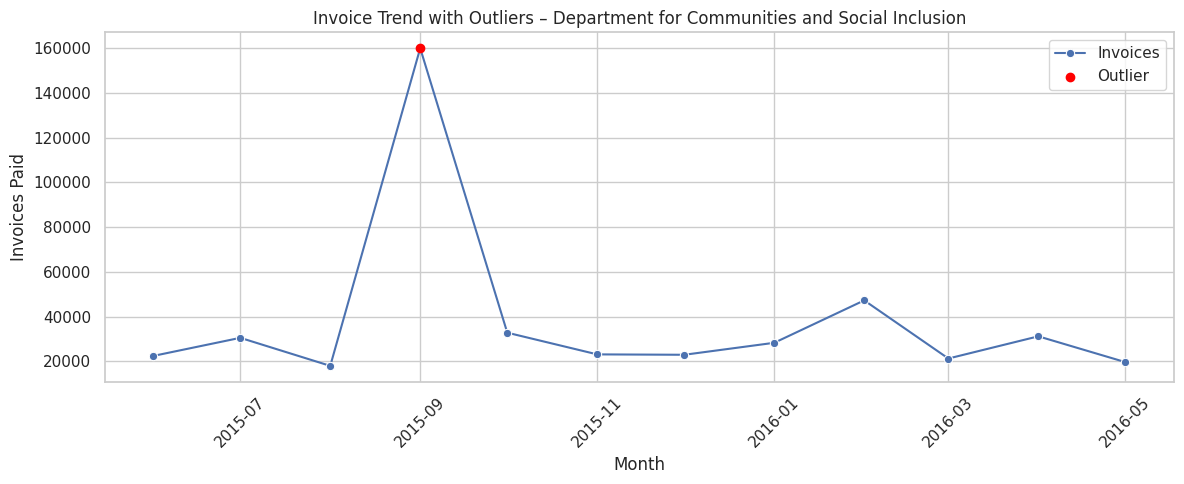

In [ ]:
agency = "Department for Communities and Social Inclusion"

plt.figure(figsize=(12, 5))
subset = df_long[df_long['Agency Name'] == agency]
sns.lineplot(data=subset, x='Month', y='Invoices Paid', marker='o', label='Invoices')

# Highlight outliers
outliers = subset[subset['Is_Outlier_Z']]
plt.scatter(outliers['Month'], outliers['Invoices Paid'], color='red', label='Outlier', zorder=5)

plt.title(f"Invoice Trend with Outliers - {agency}")
plt.xlabel("Month")
plt.ylabel("Invoices Paid")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


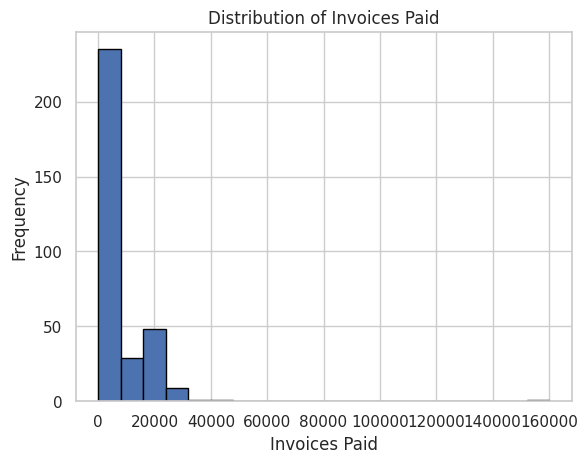

In [32]:
import matplotlib.pyplot as plt

df_long['Invoices Paid'].hist(bins=20, edgecolor='black')
plt.title("Distribution of Invoices Paid")
plt.xlabel("Invoices Paid")
plt.ylabel("Frequency")
plt.show()


In [33]:
def detect_iqr_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return (group < lower) | (group > upper)

df_long['Is_Outlier_IQR'] = df_long.groupby('Agency Name')['Invoices Paid'].transform(detect_iqr_outliers)

df_long[df_long['Is_Outlier_IQR']].sort_values(by='Invoices Paid', ascending=False).head(10)


,Agency Name,Month,Invoices Paid,Z-Score,Is_Outlier_Z,Is_Outlier_IQR
83,Department for Communities and Social Inclusion,2015-09-01,160025,3.247558,True,True
218,Department for Communities and Social Inclusion,2016-02-01,47224,0.243500,False,True
303,"Department of Planning, Transport and Infrastr...",2016-05-01,18562,1.525280,False,True
6,"Department of Planning, Transport and Infrastr...",2015-06-01,17902,1.193525,False,True
213,South Australian Housing Trust,2016-01-01,17532,-2.238551,True,True
204,SA Health (CHSALHN) CHSALHN,2016-01-01,12788,-2.486006,True,True
195,"Department of Planning, Transport and Infrastr...",2016-01-01,9982,-2.787544,True,True
5,"Department of Environment, Water and Natural R...",2015-06-01,5300,1.969381,False,True
32,"Department of Environment, Water and Natural R...",2015-07-01,5148,1.783143,False,True
261,SA Health (SA Ambulance Service),2016-03-01,4223,1.881842,False,True


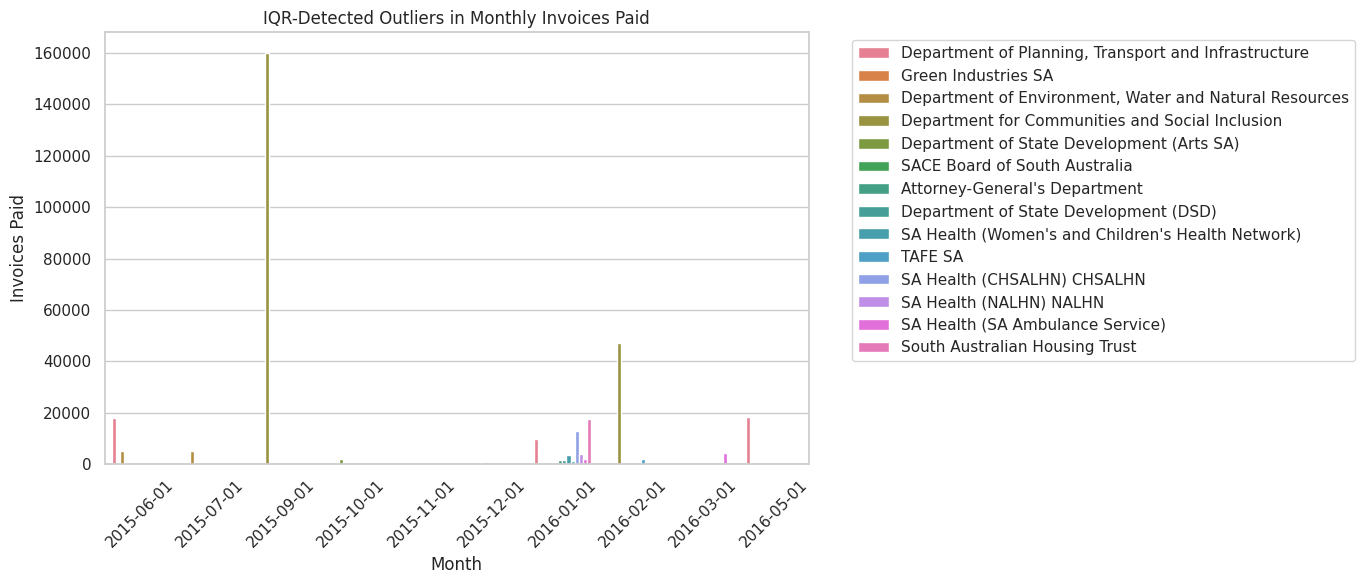

In [34]:
outliers_all = df_long[df_long["Is_Outlier_IQR"] == True]

plt.figure(figsize=(14, 6))
sns.barplot(data=outliers_all, x="Month", y="Invoices Paid", hue="Agency Name")

plt.title("IQR-Detected Outliers in Monthly Invoices Paid")
plt.xlabel("Month")
plt.ylabel("Invoices Paid")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [35]:
# Cleaned numeric column
invoices = df_long['Invoices Paid'].dropna()

# Global IQR calculation
Q1 = invoices.quantile(0.25)
Q3 = invoices.quantile(0.75)
IQR = Q3 - Q1

# Outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: -9612.0, Upper bound: 20396.0


In [36]:
df_long['Is_Global_Outlier_IQR'] = (df_long['Invoices Paid'] < lower_bound) | (df_long['Invoices Paid'] > upper_bound)
df_long[df_long['Is_Global_Outlier_IQR']].sort_values(by='Invoices Paid', ascending=False).head(10)

,Agency Name,Month,Invoices Paid,Z-Score,Is_Outlier_Z,Is_Outlier_IQR,Is_Global_Outlier_IQR
83,Department for Communities and Social Inclusion,2015-09-01,160025,3.247558,True,True,True
218,Department for Communities and Social Inclusion,2016-02-01,47224,0.243500,False,True,True
110,Department for Communities and Social Inclusion,2015-10-01,32771,-0.141404,False,False,True
272,Department for Communities and Social Inclusion,2016-04-01,31145,-0.184707,False,False,True
29,Department for Communities and Social Inclusion,2015-07-01,30473,-0.202603,False,False,True
191,Department for Communities and Social Inclusion,2016-01-01,28252,-0.261752,False,False,True
176,SA Health (CALHN) CALHN,2015-12-01,25975,1.458385,False,False,True
24,South Australian Housing Trust,2015-06-01,25047,1.455635,False,False,True
105,South Australian Housing Trust,2015-09-01,24965,1.415326,False,False,True
257,SA Health (CALHN) CALHN,2016-03-01,24930,1.069986,False,False,True


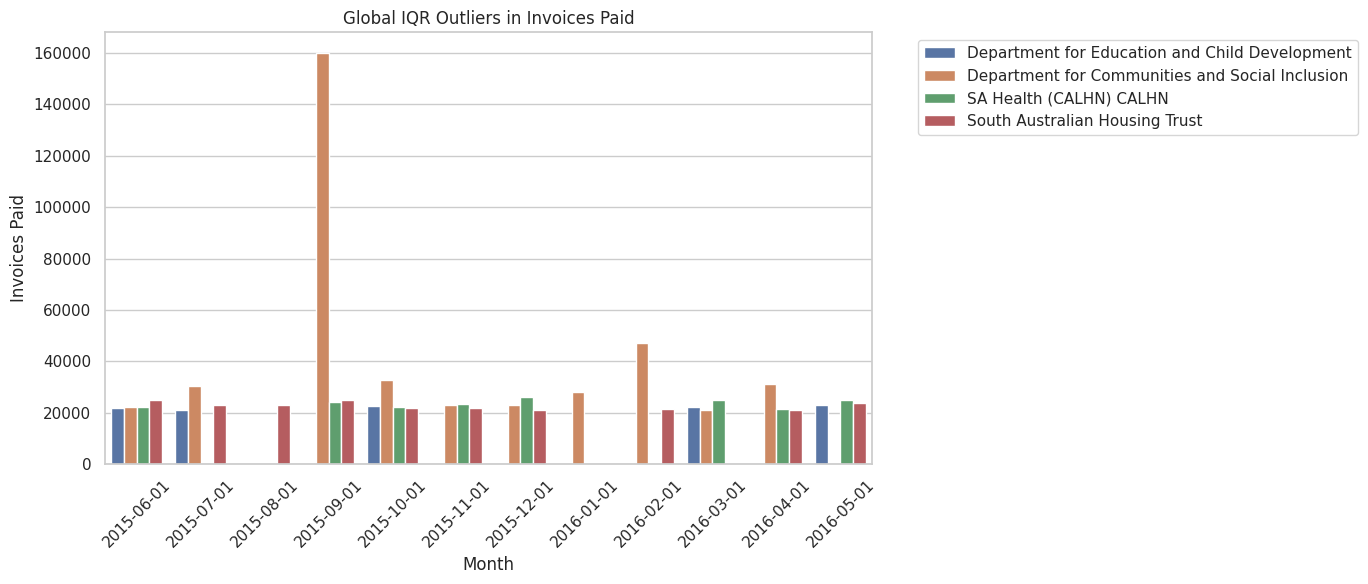

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

outliers = df_long[df_long["Is_Global_Outlier_IQR"] == True]

plt.figure(figsize=(14, 6))
sns.barplot(data=outliers, x="Month", y="Invoices Paid", hue="Agency Name")

plt.title("Global IQR Outliers in Invoices Paid")
plt.xlabel("Month")
plt.ylabel("Invoices Paid")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
